In [144]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as st
import numpy as np
sns.set()
%matplotlib inline


In [145]:
df=pd.read_csv('/kaggle/input/exploratory-data-analysis-on-netflix-data/netflix_titles_2021.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [146]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [147]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [148]:
df.type.unique()

array(['Movie', 'TV Show'], dtype=object)

### Frequency

### 1 movies vs tvshows

In [149]:
movie_count=df[df['type']=='Movie'].shape[0]
movie_count

6131

In [150]:
Tv_series_count=df[df['type']=='TV Show'].shape[0]
Tv_series_count

2676

In [151]:
counts=[movie_count,Tv_series_count]
counts
labels=['Movies','Tv_shows']



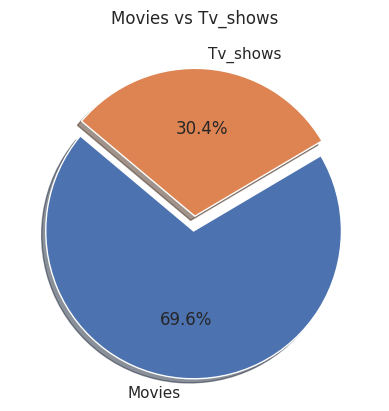

In [152]:
plt.pie(counts,labels=labels,autopct='%.1f%%',shadow=True,explode=(0.1,0),startangle=140)
plt.title('Movies vs Tv_shows')
plt.show()

In [153]:
x=df['type'].value_counts()
x
y=df['type'].value_counts(normalize=True)*100
y
frequency_table=pd.DataFrame({'Frequency':x,'percentage':y})
frequency_table

,Frequency,percentage
type,,
Movie,6131,69.615079
TV Show,2676,30.384921


Here we can clearly see that Netflix has 2 times more  movies then Tv_shows

# 2 directors column

In [154]:
freq_directors_counts=df['director'].value_counts()
freq_directors_counts
freq_directors_perc=df['director'].value_counts(normalize=True)*100
freq_directors_perc
freq_directors=pd.DataFrame({'Frequency':freq_directors_counts,'percentage':freq_directors_perc}).reset_index()
freq_directors


,director,Frequency,percentage
0,Rajiv Chilaka,19,0.307792
1,"Raúl Campos, Jan Suter",18,0.291592
2,Marcus Raboy,16,0.259193
3,Suhas Kadav,16,0.259193
4,Jay Karas,14,0.226794
...,...,...,...
4523,"Raymie Muzquiz, Stu Livingston",1,0.016200
4524,Joe Menendez,1,0.016200
4525,Eric Bross,1,0.016200
4526,Will Eisenberg,1,0.016200


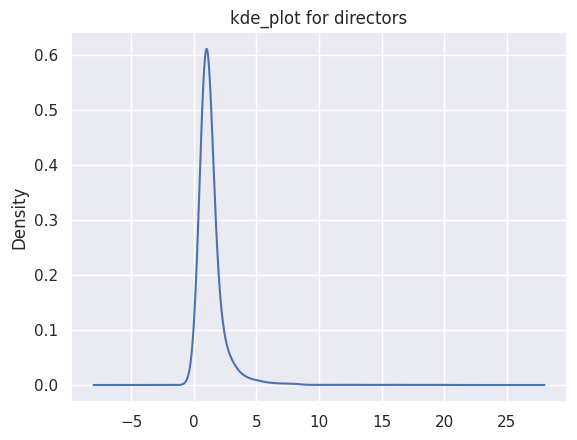

In [155]:
freq_directors_counts.plot(kind='kde', title="kde_plot for directors", bw_method=0.5)

plt.show()


# 2 country column

In [156]:
country_count=df['country'].value_counts()
country_count_percentage=df['country'].value_counts(normalize=True)*100
country_count_percentage
freq_country=pd.DataFrame({'freq':country_count,'percentage':country_count_percentage}).reset_index()
freq_country

,country,freq,percentage
0,United States,2818,35.330993
1,India,972,12.186560
2,United Kingdom,419,5.253260
3,Japan,245,3.071715
4,South Korea,199,2.494985
...,...,...,...
743,"Romania, Bulgaria, Hungary",1,0.012538
744,"Uruguay, Guatemala",1,0.012538
745,"France, Senegal, Belgium",1,0.012538
746,"Mexico, United States, Spain, Colombia",1,0.012538


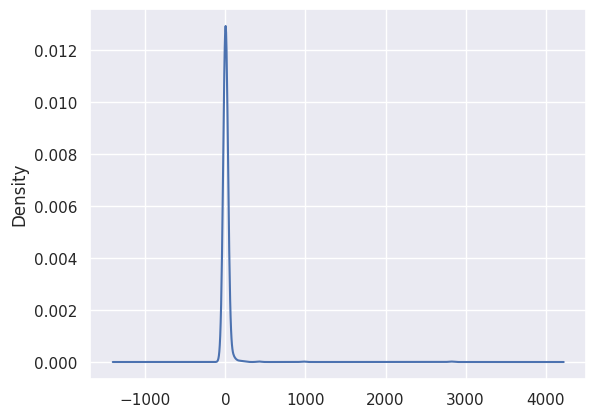

In [157]:
country_count.plot(kind='kde')
plt.show()

### Date_Added Column

In [158]:
count_date_added=df['date_added'].value_counts()
count_date_added_perc=df['date_added'].value_counts(normalize=True)*100
freq_date_added_count=pd.DataFrame({'frequency':count_date_added,'percentage':count_date_added_perc})

,frequency,percentage
date_added,,
"January 1, 2020",109,1.239059
"November 1, 2019",89,1.011709
"March 1, 2018",75,0.852563
"December 31, 2019",74,0.841196
"October 1, 2018",71,0.807093
...,...,...
"December 4, 2016",1,0.011368
"November 21, 2016",1,0.011368
"November 19, 2016",1,0.011368


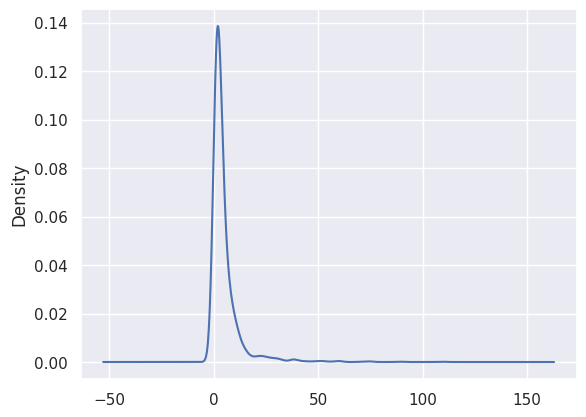

In [159]:
count_date_added.plot(kind='kde')
freq_date_added_count

### release year

In [160]:
release_year_count=df['release_year'].value_counts().reset_index()
release_year_count

,release_year,count
0,2018,1147
1,2017,1032
2,2019,1030
3,2020,953
4,2016,902
...,...,...
69,1959,1
70,1925,1
71,1961,1
72,1947,1


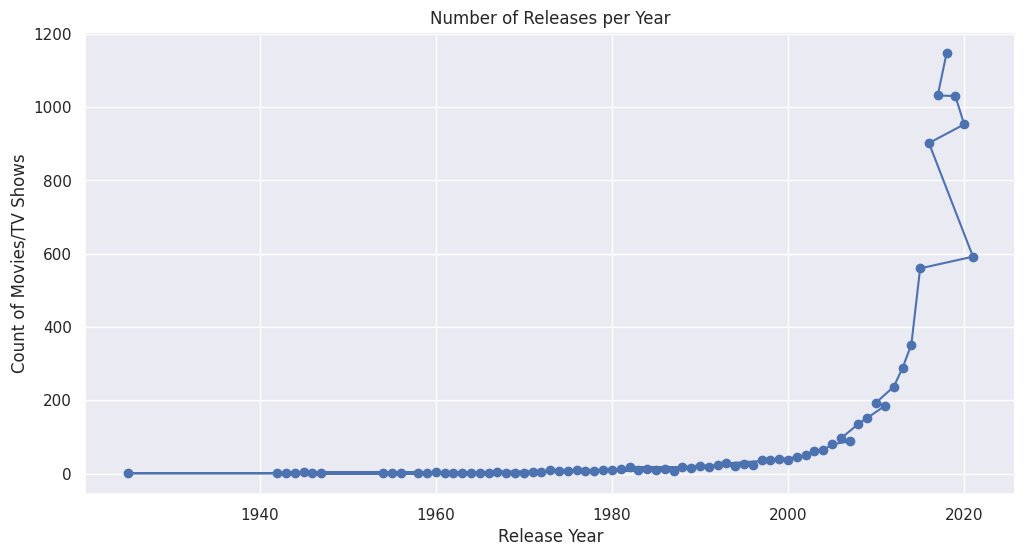

In [161]:



plt.figure(figsize=(12, 6))
plt.plot(release_year_count['release_year'], release_year_count['count'], marker='o', linestyle='-', color='b')


plt.title('Number of Releases per Year')
plt.xlabel('Release Year')
plt.ylabel('Count of Movies/TV Shows')
plt.grid(True)


plt.show()


### Rating column


In [162]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [163]:
count_rating=df['rating'].value_counts().reset_index()
count_rating


,rating,count
0,TV-MA,3207
1,TV-14,2160
2,TV-PG,863
3,R,799
4,PG-13,490
5,TV-Y7,334
6,TV-Y,307
7,PG,287
8,TV-G,220
9,NR,80


In [164]:
### i can see 3 unusual vales here because rating cant be in min
##due to we only have 3 columns like that i want to drop it

### Dropping unusual columns

In [165]:
df[(df['rating']=='74 min')|(df['rating']=='84 min')|(df['rating']=='66 min')]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


In [166]:
### dropping above 3 columns by using their index

In [167]:
df.index

RangeIndex(start=0, stop=8807, step=1)

In [168]:
df=df.drop([5541,5794,5813],errors='ignore')
count_rating_fil=df['rating'].value_counts()
count_rating_fil

count_rating_fil_perc=df['rating'].value_counts(normalize=True)*100
count_rating_fil_perc
Rating_count=pd.DataFrame({'Frequency':count_rating_fil,'Percentage':count_rating_fil_perc})
Rating_count

,Frequency,Percentage
rating,,
TV-MA,3207,36.443182
TV-14,2160,24.545455
TV-PG,863,9.806818
R,799,9.079545
PG-13,490,5.568182
TV-Y7,334,3.795455
TV-Y,307,3.488636
PG,287,3.261364
TV-G,220,2.500000


<Axes: xlabel='rating'>

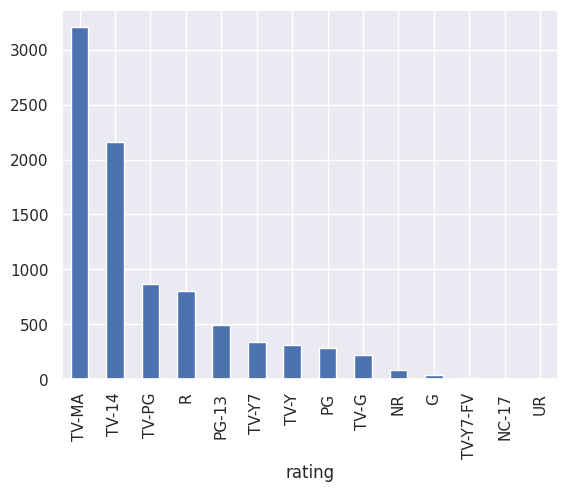

In [169]:
count_rating_fil.plot(kind='bar')

In [170]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


### Duration column

In [171]:
duration_counts=df['duration'].value_counts()
duration_counts
duration_counts_perc=df['duration'].value_counts(normalize=True)*100
duration_counts_perc
Duration_count=pd.DataFrame({'frequency':duration_counts,'percentage':duration_counts_perc})

,frequency,percentage
duration,,
1 Season,1793,20.365743
2 Seasons,425,4.827351
3 Seasons,199,2.260336
90 min,152,1.726488
94 min,146,1.658337
...,...,...
16 min,1,0.011358
186 min,1,0.011358
193 min,1,0.011358


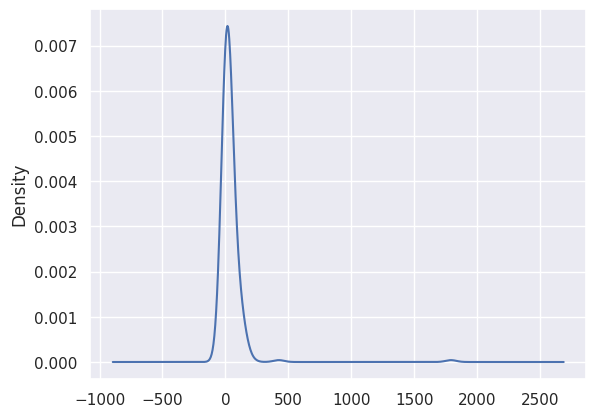

In [172]:
duration_counts.plot(kind='kde')
Duration_count


### listed in

In [173]:
list_in_counts=df['listed_in'].value_counts()
list_in_counts
list_in_counts_perc=df['listed_in'].value_counts(normalize=True)*100
list_in_counts_perc
Duration_count=pd.DataFrame({'frequency':list_in_counts,'percentage':list_in_counts_perc})

In [174]:
Duration_count

,frequency,percentage
listed_in,,
"Dramas, International Movies",362,4.111767
Documentaries,359,4.077692
Stand-Up Comedy,334,3.793730
"Comedies, Dramas, International Movies",274,3.112222
"Dramas, Independent Movies, International Movies",252,2.862335
...,...,...
"Kids' TV, TV Action & Adventure, TV Dramas",1,0.011358
"TV Comedies, TV Dramas, TV Horror",1,0.011358
"Children & Family Movies, Comedies, LGBTQ Movies",1,0.011358


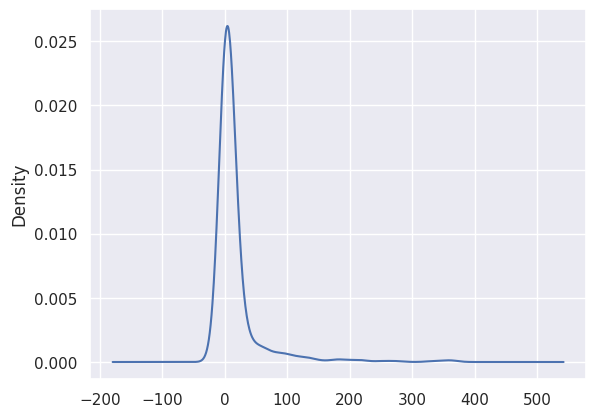

In [175]:
list_in_counts.plot(kind='kde')
plt.show()

# Data cleaning

In [176]:
null=df.isnull().sum()
null
total_nulls=2634+825+831+10+4

In [177]:
total_nulls=2634+825+831+10+4
total_nulls

4304

In [178]:
### DAta visualization of null values

In [179]:
null=df.isnull().sum()
null_percentage=(null/total_nulls)*100
null_counts=pd.DataFrame({'nulls':null,'percentage':null_percentage})
null_counts

,nulls,percentage
show_id,0,0.000000
type,0,0.000000
title,0,0.000000
director,2634,61.198885
cast,825,19.168216
country,831,19.307621
date_added,10,0.232342
release_year,0,0.000000
rating,4,0.092937
duration,0,0.000000


,nulls,percentage
show_id,0,0.000000
type,0,0.000000
title,0,0.000000
director,2634,61.198885
cast,825,19.168216
country,831,19.307621
date_added,10,0.232342
release_year,0,0.000000
rating,4,0.092937
duration,0,0.000000


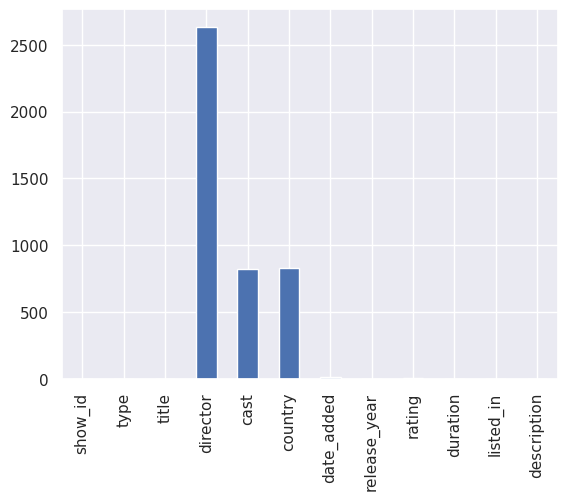

In [180]:
null.plot(kind='bar')
null_counts

### AS we can see in above bar plot 3 columns has null values which are director,cast,country in that director has more null null values with outstanding 61.198%

In [181]:
null_counts_only_nulls=null_counts[null_counts['nulls']>0]
null_counts_only_nulls=null_counts_only_nulls.drop('nulls',axis=1)
null_counts_only_nulls

,percentage
director,61.198885
cast,19.168216
country,19.307621
date_added,0.232342
rating,0.092937


### Drawing piechart for only columns with nulls ,after removing remianing columns(no null columns)

In [182]:
values=null_counts_only_nulls.values
label=null_counts_only_nulls.index

value

NameError: name 'value' is not defined

In [ ]:
values = values.values if hasattr(values, 'values') else values  # Make sure values is 1D
labels = labels.values if hasattr(labels, 'values') else labels  # Make sure labels is 1D

values

### changing 2d to 1d array

In [ ]:
values_arr_1d = values.ravel()

In [ ]:
values_arr_1d

In [ ]:
plt.pie(values_arr_1d,labels=label,autopct='%1.1f%%',shadow=True,explode=(0.1,0,0,0,0))
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Example data
sizes = [61.2, 19.2, 19.3, 0.2, 0.1]
labels = ['director', 'cast', 'country', 'date_added', 'rating']

# Create the pie chart
wedges, texts, autotexts = plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

# Modify the text labels (font size and color)
for text in texts:
    text.set_fontsize(14)
    text.set_color('blue')

# Modify the percentage text (font size and color)
for autotext in autotexts:
    autotext.set_fontsize(14)
    autotext.set_color('red')

# Modify the wedge slices (color)
for wedge in wedges:
    wedge.set_facecolor('lightgreen')

# Display the pie chart
plt.title('Customized Pie Chart')
plt.show()


In [ ]:
df.head()

In [ ]:
sns.heatmap(df.isnull())

### As we can see only director,cast,country columns has major null values ,instead of dropping them i want to replace null with 'missing' so that our datasframe dont have null values

In [ ]:
df_copy=df.copy()

In [ ]:
df_copy

In [183]:
df_copy=df_copy.fillna('missing')

In [184]:
df_copy.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

### Now we can see country wise movies vs Tv_show percentage etc

In [185]:
df_copy.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,missing,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,missing,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",missing,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,missing,missing,missing,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,missing,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [186]:
df_copy['release_year'].unique()

array([2020, 2021, 1993, 2018, 1996, 1998, 1997, 2010, 2013, 2017, 1975,
       1978, 1983, 1987, 2012, 2001, 2014, 2002, 2003, 2004, 2011, 2008,
       2009, 2007, 2005, 2006, 1994, 2015, 2019, 2016, 1982, 1989, 1990,
       1991, 1999, 1986, 1992, 1984, 1980, 1961, 2000, 1995, 1985, 1976,
       1959, 1988, 1981, 1972, 1964, 1945, 1954, 1979, 1958, 1956, 1963,
       1970, 1973, 1925, 1974, 1960, 1966, 1971, 1962, 1969, 1977, 1967,
       1968, 1965, 1946, 1942, 1955, 1944, 1947, 1943])

In [187]:
df_gropup1=df_copy.groupby('type')['release_year'].value_counts().reset_index()
df_gropup1

,type,release_year,count
0,Movie,2018,767
1,Movie,2017,766
2,Movie,2016,658
3,Movie,2019,633
4,Movie,2020,517
...,...,...,...
114,TV Show,1979,1
115,TV Show,1981,1
116,TV Show,1985,1
117,TV Show,1989,1


In [188]:
df_grouped = df_gropup1.groupby(['release_year', 'type'])['count'].sum().unstack()
df_grouped


/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


type,Movie,TV Show
release_year,,
1925,NaN,1.0
1942,2.0,NaN
1943,3.0,NaN
1944,3.0,NaN
1945,3.0,1.0
...,...,...
2017,766.0,265.0
2018,767.0,380.0
2019,633.0,397.0


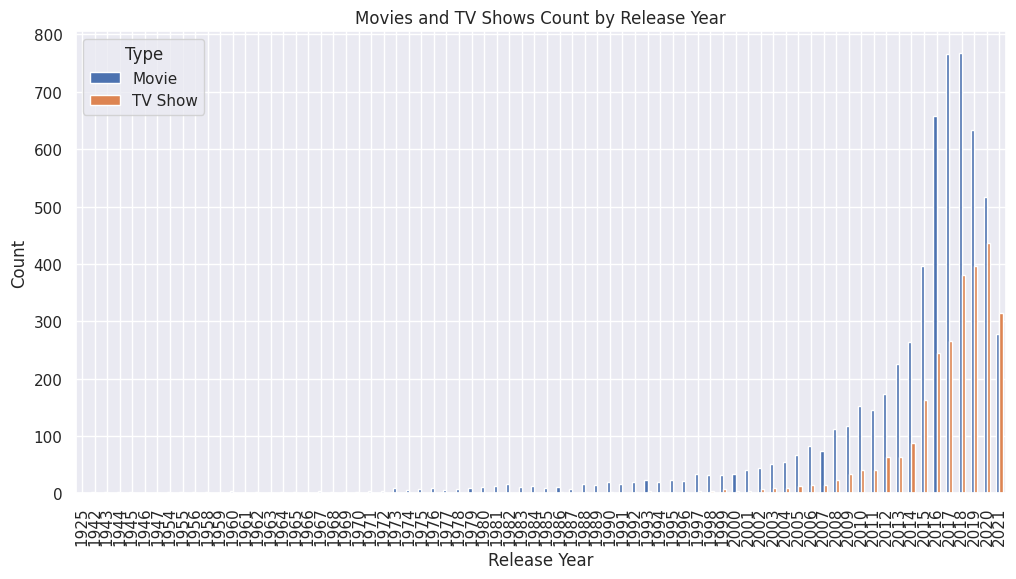

In [189]:
df_grouped.plot(kind='bar', figsize=(12, 6), stacked=False)
plt.title('Movies and TV Shows Count by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.legend(title='Type')
plt.show()

### As we can see no.of movies and Tv_shows in (2016,2017,2018,2019) are peaked.but, slowly got decreased due to covid
### Difference between no.of movies and tv_shows got declined from 2019.In 2021 no.of tv_shows released is more then movies ,
### covid also effected the entertainment industry where people started watching longer forms of entertainment


### top 10 countries with tv_shows and movies

In [190]:
df_copy.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,missing,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,missing,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",missing,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,missing,missing,missing,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,missing,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [191]:
df_country_type=df_copy.groupby('type')['country'].value_counts().reset_index()




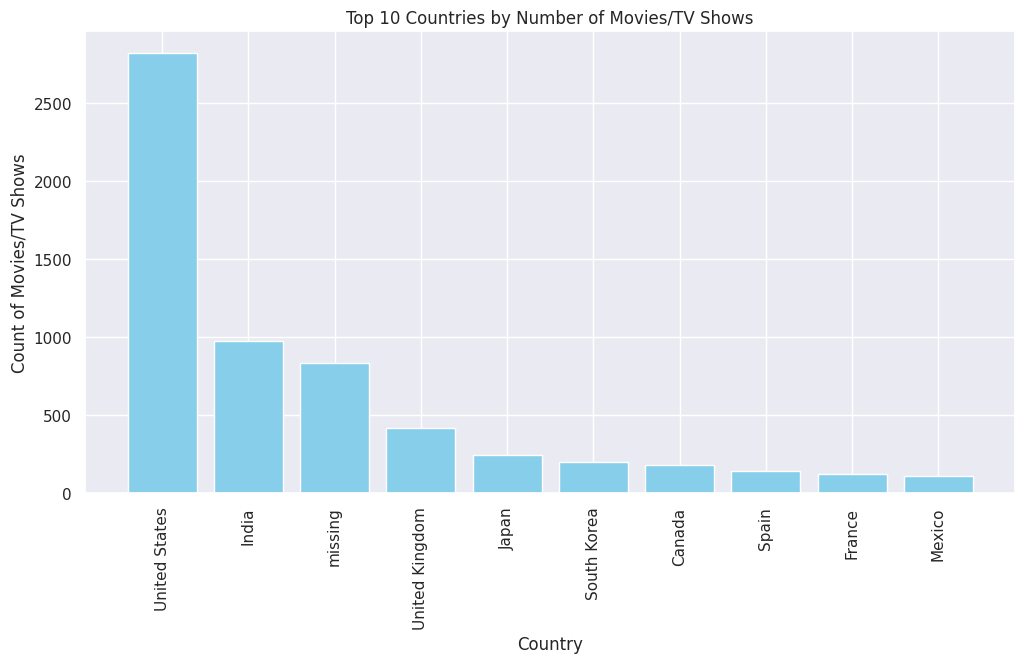

,country,type,count
603,United States,MovieTV Show,2815
251,India,MovieTV Show,972
748,missing,MovieTV Show,831
506,United Kingdom,MovieTV Show,419
319,Japan,MovieTV Show,245
435,South Korea,MovieTV Show,199
58,Canada,MovieTV Show,181
444,Spain,MovieTV Show,145
162,France,MovieTV Show,124
342,Mexico,MovieTV Show,110


In [192]:



country_grouped = df_country_type.groupby('country').sum().reset_index()

top_countries = country_grouped.sort_values(by='count', ascending=False).head(10)

plt.figure(figsize=(12, 6))
plt.bar(top_countries['country'], top_countries['count'], color='skyblue')

plt.title('Top 10 Countries by Number of Movies/TV Shows')
plt.xlabel('Country')
plt.ylabel('Count of Movies/TV Shows')
plt.xticks(rotation=90)  


plt.show()
top_countries.head(10)

###Hollywood is producing more no.of movies and tv_shows compared to other countries ,2nd led by india 
and we have 831 missings in countries column 


### lets see TV_shows and preffered no.of seasons

In [193]:
df_copy_tv_shows=df_copy[df_copy['type']=='TV Show']
df_copy_tv_shows

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,missing,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",missing,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,missing,missing,missing,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,missing,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",missing,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
...,...,...,...,...,...,...,...,...,...,...,...,...
8795,s8796,TV Show,Yu-Gi-Oh! Arc-V,missing,"Mike Liscio, Emily Bauer, Billy Bob Thompson, ...","Japan, Canada","May 1, 2018",2015,TV-Y7,2 Seasons,"Anime Series, Kids' TV",Now that he's discovered the Pendulum Summonin...
8796,s8797,TV Show,Yunus Emre,missing,"Gökhan Atalay, Payidar Tüfekçioglu, Baran Akbu...",Turkey,"January 17, 2017",2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas","During the Mongol invasions, Yunus Emre leaves..."
8797,s8798,TV Show,Zak Storm,missing,"Michael Johnston, Jessica Gee-George, Christin...","United States, France, South Korea, Indonesia","September 13, 2018",2016,TV-Y7,3 Seasons,Kids' TV,Teen surfer Zak Storm is mysteriously transpor...
8800,s8801,TV Show,Zindagi Gulzar Hai,missing,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,"December 15, 2016",2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre..."


In [194]:
df_tv_shows1=df_copy_tv_shows.groupby('type')['duration'].value_counts().reset_index()


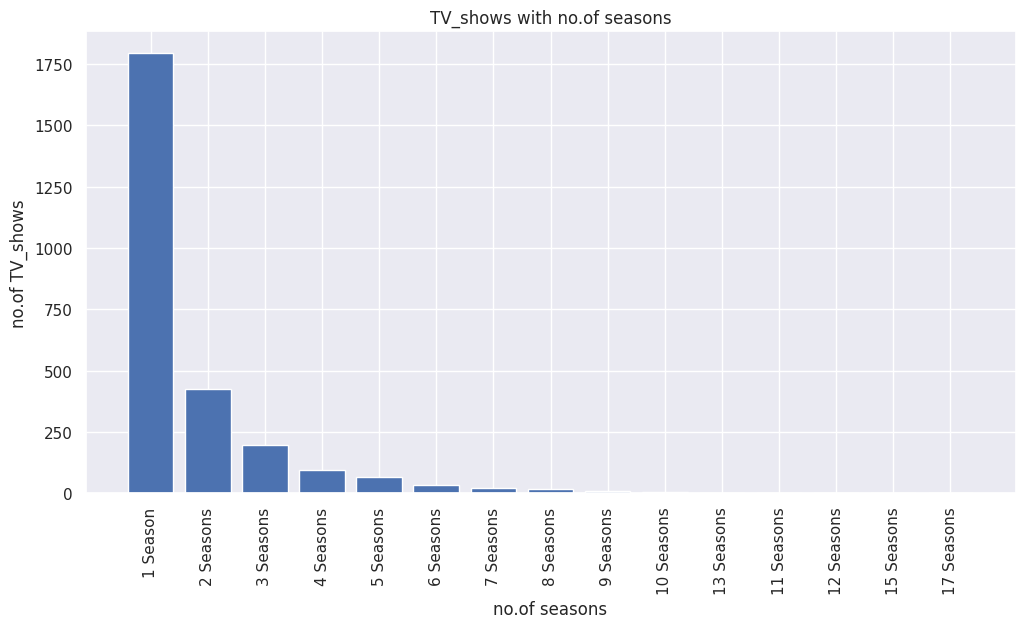

,type,duration,count
0,TV Show,1 Season,1793
1,TV Show,2 Seasons,425
2,TV Show,3 Seasons,199
3,TV Show,4 Seasons,95
4,TV Show,5 Seasons,65
5,TV Show,6 Seasons,33
6,TV Show,7 Seasons,23
7,TV Show,8 Seasons,17
8,TV Show,9 Seasons,9
9,TV Show,10 Seasons,7


In [195]:
plt.figure(figsize=(12, 6))
plt.bar(df_tv_shows1['duration'],df_tv_shows1['count'])
plt.title('TV_shows with no.of seasons')
plt.xlabel('no.of seasons')
plt.ylabel('no.of TV_shows')
plt.xticks(rotation=90)
plt.show()
df_tv_shows1

Here we can clearly see TV_shows with 1 season is dominating in this list 
There could be so many reasons like 1)tv_shows getting canceled after 1 season due to lack of success
2)conflicts between production house and writers or directors etc..


In [196]:
pip install -U pandas_profiling

Note: you may need to restart the kernel to use updated packages.


In [197]:
pip install --upgrade numba

Note: you may need to restart the kernel to use updated packages.


In [198]:
pip install --upgrade pandas-profiling visions

Note: you may need to restart the kernel to use updated packages.


In [199]:
import pandas_profiling as prf

PydanticImportError: `BaseSettings` has been moved to the `pydantic-settings` package. See https://docs.pydantic.dev/2.10/migration/#basesettings-has-moved-to-pydantic-settings for more details.

For further information visit https://errors.pydantic.dev/2.10/u/import-error

In [ ]:
pip install pydantic-settings
